# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Введение в анализ данных"</center>

# <center>Лабораторная работа №3. Supervised Learning</center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', None)

In [3]:
data = pd.read_csv("students_data.csv")

data.shape

(1044, 36)

In [4]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [5]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


## Часть 1. Предобработка данных

* Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков, приведение признаков к числовому виду.  
* Оцените значимость признаков для определения итоговой оценки за курс. Исключите из выборки незначимые на ваш взгляд признаки, обоснуйте свое решение. 
* (Опционально) Feature engineering: создайте новые признаки (значимые) на основе уже имеющихся.

In [6]:
for column in data.columns:
    if data[column].dtype=='object':
        print(column, data[column].unique() , '', sep='\n')

Subject
['Por' 'Math']

school
['GP' 'MS']

sex
['F' 'M' 'm']

address
['U' 'R']

famsize
['GT3' 'LE3']

Pstatus
['A' 'T' 't']

Medu
['3' '1' '2' '4' '0' 'o']

Fedu
['4' '2' '3' '1' 'o' '0']

Mjob
['services' 'other' 'health' 'at_home' 'teacher' 'at-home']

Fjob
['other' 'services' 'health' 'at-home' 'teacher' 'at_home']

reason
['course' 'home' 'reputation' 'other']

guardian
['father' 'mother' 'other' 'futher']

schoolsup
['no' 'yes']

famsup
['no' 'yes']

paid
['no' 'yes']

activities
['no' 'yes']

nursery
['yes' 'no']

higher
['yes' 'no']

internet
['yes' 'no']

romantic
['no' nan 'yes']

cheating
[nan 'yes' 'no']



In [7]:
data.loc[data['sex'] == 'm', 'sex'] = 'M'
data.loc[data['Pstatus'] == 't', 'Pstatus'] = 'T'
data.loc[data['Medu'] == 'o', 'Medu'] = 0
data.loc[data['Fedu'] == 'o', 'Fedu'] = 0
data.loc[data['Mjob'] == 'at-home', 'Mjob'] = 'at_home'
data.loc[data['Fjob'] == 'at-home', 'Fjob'] = 'at_home'
data.loc[data['guardian'] == 'futher', 'guardian'] = 'father'

In [8]:
# если какие-то ID одинаковы, исправляю их
while (data.groupby(by='ID').count().shape[0] != data.shape[0]):
    index = 0
    for i in range(0, data.shape[0]):
        for j in range(i + 1, data.shape[0]):
            if (data.iat[i, 0] == data.iat[j, 0]):
                index = j
    data.loc[index, 'ID'] = data.iat[index, 0] + 1
    
# бинарные признаки привожу к 0 и 1, чтобы с ними было легче работать
data.rename(columns={'Subject': 'is_Math', 
                     'school': 'is_GP', 
                     'sex': 'is_Fem', 
                     'address': 'is_U', 
                     'famsize': 'is_LE3',
                     'Pstatus': 'is_together',
                    }, inplace=True)
data = data.replace(['Math', 'GP', 'F', 'U', 'LE3', 'T', 'yes'], 1)
data = data.replace(['Por', 'MS', 'M', 'R', 'GT3', 'A', 'no'], 0)
data = data.replace(['other', 'services', 'health', 'at_home', 'teacher'], [0, 1, 2, 3, 4])
data = data.replace(['course', 'home', 'reputation', 'other'], [0, 1, 2, 3])
data = data.replace(['father', 'mother', 'other'], [0, 1, 2])

# в cheating больше половины строк имеют значение nan, поэтому удаляю этот столбец
data.drop('cheating', axis=1, inplace=True)

# помимо пропусков в cheating, существует 40 пропусков значений в разных строках
# мне кажется, что удаление строк с пропущенными значениями не должно сильно влиять на качество, так как
# 40 - это достаточно малая часть от всех строк, поэтому я удаляю эти строки
data = data.dropna() 

data['Medu'] = data.Medu.astype('int64')
data['Fedu'] = data.Fedu.astype('int64')

data

,ID,is_Math,is_GP,is_Fem,age,is_U,is_LE3,is_together,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,100097,0,1,1,16,1,0,0,3,4,1,0,0,0,1,1,0,0,0,0,0,1,1,1,0.0,3.0,2,1,1.0,4.0,5,12,15,13,14
1,101021,0,1,1,17,1,0,1,3,2,0,0,0,1,1,2,0,0,0,0,1,0,1,1,0.0,5.0,3,4,1.0,3.0,3,2,17,18,17
2,102965,0,1,0,16,1,1,1,1,2,2,1,0,1,2,1,2,0,0,0,0,0,1,1,0.0,4.0,4,5,3.0,5.0,5,0,9,8,10
3,102989,0,0,0,17,1,0,1,2,3,0,1,1,0,2,2,0,0,0,0,1,1,1,1,0.0,4.0,4,3,1.0,1.0,3,4,14,15,16
5,103144,0,1,0,18,1,1,1,3,1,1,1,0,1,2,1,0,0,0,0,1,1,1,1,1.0,3.0,3,4,4.0,5.0,4,2,11,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,995838,0,0,1,15,0,0,1,3,3,1,0,2,1,1,2,0,0,1,0,0,1,1,1,1.0,4.0,5,4,1.0,1.0,1,4,13,12,12
1038,996164,0,1,0,16,1,1,1,2,2,0,0,1,1,1,2,0,0,0,0,0,1,1,1,0.0,4.0,4,4,1.0,1.0,3,0,13,12,13
1039,997832,1,1,1,15,0,0,1,3,3,1,1,2,0,2,3,2,0,1,1,1,1,1,1,1.0,4.0,2,1,2.0,3.0,3,8,10,10,10
1040,997897,0,1,0,15,0,0,1,2,1,2,1,2,1,1,2,0,0,0,0,1,1,1,1,1.0,5.0,4,2,1.0,1.0,5,4,10,9,10


In [9]:
# можно посмотреть, какие признаки меньше всего влияют на G3:
pd.DataFrame(abs(data.corr()['G3'])).sort_values(by="G3", ascending=False)

,G3
G3,1.000000
G2,0.910560
G1,0.807610
failures,0.382542
higher,0.231535
Medu,0.207814
is_Math,0.194425
Fedu,0.164776
studytime,0.158775
reason,0.132051


In [10]:
# решаю убрать все признаки, которые влияют менее, чем на 0.45 процентов: absences, nursery, activities, 
# is_Fem, is_together, famsup, ID (это, конечно, было очевидно), guardian
data.drop(['absences', 'nursery', 'activities', 'is_Fem', 'is_together', 'famsup', 'ID', 'guardian'], axis=1, inplace=True)

* Разделите данные на две части - данные для моделирования (80%) и отложенную выборку (20%). Убедитесь, что распределение целевой переменной (`G3`) одинаково в обоих частях.  

[]

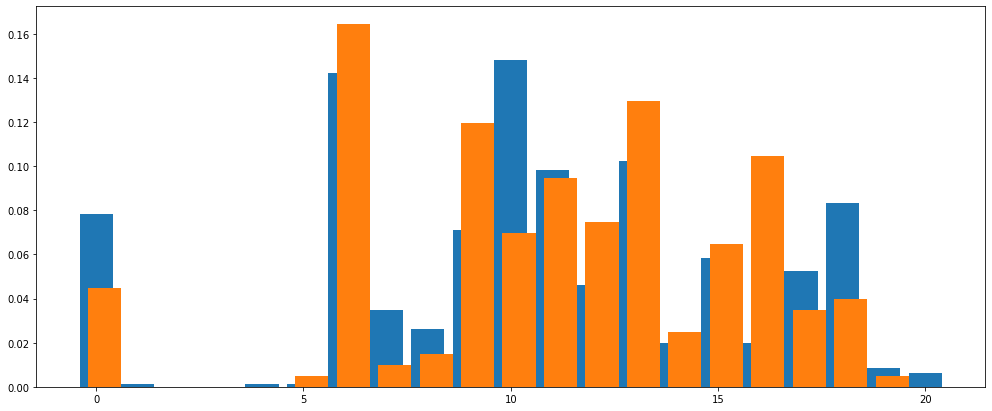

In [22]:
from sklearn.model_selection import train_test_split

X, y = data.drop(['G2', 'G3'], axis=1), data['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train_2 = X_train.drop(['G1'], axis=1)
X_test_2 = X_test.drop(['G1'], axis=1)

plt.figure(figsize=(17, 7))
ax = plt.subplot()
ax.bar(y_train.unique(), y_train.value_counts() / y_train.count())
ax.bar(y_test.unique() + 0.2, y_test.value_counts() / y_test.count())
ax.plot()

##### На графике заметно, что распределение целевой функции можно назвать одинаковым, несмотря на небольшие отличия

## Часть 2. Регрессия

* Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`). При решении задачи **нельзя** использовать признак `G2`.  
<br>  
* Для решения задачи примените следующие методы:  
  * Линейная регрессия + регуляризации  
  * Полиномиальная регрессия  
  * KNN  
  * Деревья решений, Random Forest  
  
  Для каждого метода выполните настройку гиперпараметров на кросс-валидации.  
<br>    
* Оцените качество каждой модели на отложенной выборке, используйте различные метрики. Сравните модели и сделайте вывод о качестве решения задачи.  
<br>    
* Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
<br>    
* В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

In [86]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error, explained_variance_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [24]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

# функция mape была реализована для того, чтобы при делении на 0 не возникало ошибки
def mape(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred))))

def regression_metrics(y_true, y_pred, name):
    result = []
    result.append(name)
    result.append(explained_variance_score(y_true, y_pred))
    result.append(max_error(y_true, y_pred))
    result.append(mean_squared_error(y_true, y_pred))
    result.append(mean_absolute_error(y_true, y_pred))
    result.append(r2_score(y_true, y_pred))
    result.append(mape(y_true, y_pred))
    return result

In [57]:
values = []

# Линейная регрессия

param_grid = { 'n_jobs': range(1, 20) }
linreg = GridSearchCV(estimator = LinearRegression(), param_grid=param_grid, scoring='r2') 
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
values.append(regression_metrics(y_test, y_pred, 'linear reg w g1'))
print('ridge reg with g1:', linreg.best_estimator_)

linreg = GridSearchCV(estimator = LinearRegression(), param_grid=param_grid, scoring='r2') 
linreg.fit(X_train_2, y_train)
y_pred = linreg.predict(X_test_2)
values.append(regression_metrics(y_test, y_pred, 'linear reg'))
print('ridge reg:', linreg.best_estimator_)

# Гребневая регрессия

lambdas = [0, 0.1, 0.5, 1, 5, 10, 25, 50, 100, 250, 500, 1000, 5000, 10000]

ridgecv = RidgeCV(alphas=lambdas, cv=10) 
ridgecv.fit(X_train, y_train)
y_pred = ridgecv.predict(X_test)
values.append(regression_metrics(y_test, y_pred, 'ridge reg w g1'))
print('ridge reg with g1: lambda is', ridgecv.alpha_)

ridgecv = RidgeCV(alphas=lambdas, cv=10) 
ridgecv.fit(X_train_2, y_train)
y_pred = ridgecv.predict(X_test_2)
values.append(regression_metrics(y_test, y_pred, 'ridge reg'))
print('ridge reg: lambda is', ridgecv.alpha_)

# Lasso

lassocv = LassoCV(alphas=lambdas, cv=10) 
lassocv.fit(X_train, y_train)
y_pred = lassocv.predict(X_test)
values.append(regression_metrics(y_test, y_pred, 'lasso reg w g1'))
print('lasso reg with g1: lambda is', lassocv.alpha_)

lassocv = LassoCV(alphas=lambdas, cv=10) 
lassocv.fit(X_train_2, y_train)
y_pred = lassocv.predict(X_test_2)
values.append(regression_metrics(y_test, y_pred, 'lasso reg'))
print('lasso reg: lambda is', lassocv.alpha_)

# Полиномиальная: квадратическая и кубическая

regr = RidgeCV(alphas=lambdas, cv=10)

quadr = PolynomialFeatures(degree=2)

X_quadr = quadr.fit_transform(X_train)
regr_q = regr.fit(X_quadr, y_train)
y_pred = regr_q.predict(quadr.fit_transform(X_test))
values.append(regression_metrics(y_test, y_pred, 'quadr polynom reg w g1'))
print('quadr polynom reg with g1: lambda is', regr_q.alpha_)

X_quadr = quadr.fit_transform(X_train_2)
regr_q = regr.fit(X_quadr, y_train)
y_pred = regr_q.predict(quadr.fit_transform(X_test_2))
values.append(regression_metrics(y_test, y_pred, 'quadr polynom reg'))
print('quadr polynom reg: lambda is', regr_q.alpha_)

cub = PolynomialFeatures(degree=3)

X_cub = cub.fit_transform(X_train)
regr_c = regr.fit(X_cub, y_train)
y_pred = regr_c.predict(cub.fit_transform(X_test))
values.append(regression_metrics(y_test, y_pred, 'cub polynom reg w g1'))
print('cub polynom reg with g1: lambda is', regr_c.alpha_)

X_cub = cub.fit_transform(X_train_2)
regr_c = regr.fit(X_cub, y_train)
y_pred = regr_c.predict(cub.fit_transform(X_test_2))
values.append(regression_metrics(y_test, y_pred, 'cub polynom reg'))
print('cub polynom reg: lambda is', regr_c.alpha_)

# KNN

param_grid = {'n_neighbors':range(1, 20),
              'weights': ['uniform', 'distance']} 
grid_knn = GridSearchCV(estimator = KNeighborsRegressor(), param_grid=param_grid, scoring='r2') 
grid_knn.fit(X_train, y_train)
y_pred = grid_knn.predict(X_test)
values.append(regression_metrics(y_test, y_pred, 'knn reg w g1'))
print('knn reg with g1:', grid_knn.best_estimator_)

grid_knn = GridSearchCV(estimator = KNeighborsRegressor(), param_grid=param_grid, scoring='r2') 
grid_knn.fit(X_train_2, y_train)
y_pred = grid_knn.predict(X_test_2)
values.append(regression_metrics(y_test, y_pred, 'knn reg'))
print('knn reg:', grid_knn.best_estimator_)

# Деревье решений

param_grid = {'max_depth': range(1, 20),
              'min_samples_split': range(2, 10)} 
grid_dt = GridSearchCV(estimator = DecisionTreeRegressor(), param_grid=param_grid, scoring='r2') 
grid_dt.fit(X_train, y_train)
y_pred = grid_dt.predict(X_test)
values.append(regression_metrics(y_test, y_pred, 'dec tree reg w g1'))
print('dec tree reg with g1:', grid_dt.best_estimator_)

grid_dt = GridSearchCV(estimator = DecisionTreeRegressor(), param_grid=param_grid, scoring='r2') 
grid_dt.fit(X_train_2, y_train)
y_pred = grid_dt.predict(X_test_2)
values.append(regression_metrics(y_test, y_pred, 'dec tree reg'))
print('dec tree reg:', grid_dt.best_estimator_)

# Random Forest

param_grid = {'max_depth': range(2, 20),
              'n_estimators':range(10, 200, 10)} 
grid_rf = GridSearchCV(estimator = RandomForestRegressor(), param_grid=param_grid, scoring='r2') 
grid_rf.fit(X_train, y_train)
y_pred = grid_rf.predict(X_test)
values.append(regression_metrics(y_test, y_pred, 'rand forest reg w g1'))
print('rand forest reg with g1:', grid_rf.best_estimator_)

grid_rf = GridSearchCV(estimator = RandomForestRegressor(), param_grid=param_grid, scoring='r2') 
grid_rf.fit(X_train_2, y_train)
y_pred = grid_rf.predict(X_test_2)
values.append(regression_metrics(y_test, y_pred, 'rand forest reg'))
print('rand forest reg:', grid_rf.best_estimator_)

ridge reg with g1: LinearRegression(n_jobs=1)
ridge reg: LinearRegression(n_jobs=1)
ridge reg with g1: lambda is 100.0
ridge reg: lambda is 25.0
lasso reg with g1: lambda is 0.1
lasso reg: lambda is 0.0
quadr polynom reg with g1: lambda is 10000.0
quadr polynom reg: lambda is 1000.0
cub polynom reg with g1: lambda is 10000.0
cub polynom reg: lambda is 10000.0
knn reg with g1: KNeighborsRegressor(n_neighbors=19, weights='distance')
knn reg: KNeighborsRegressor(n_neighbors=12, weights='distance')
dec tree reg with g1: DecisionTreeRegressor(max_depth=3)
dec tree reg: DecisionTreeRegressor(max_depth=2)
rand forest reg with g1: RandomForestRegressor(max_depth=4, n_estimators=160)
rand forest reg: RandomForestRegressor(max_depth=8, n_estimators=170)


In [58]:
df = pd.DataFrame(values, columns =['Regression', 'VarianceScore', 'MaxError', 'MSE', 'MAE', 'R2', 'MAPE'])
df

,Regression,VarianceScore,MaxError,MSE,MAE,R2,MAPE
0,linear reg w g1,0.678855,7.775594,4.360250,1.459762,0.677784,0.128470
1,linear reg,0.199313,11.806137,11.155658,2.461445,0.175615,0.206283
2,ridge reg w g1,0.678016,8.285523,4.367442,1.427495,0.677253,0.124619
3,ridge reg,0.205615,11.878797,11.064872,2.425361,0.182324,0.202430
4,lasso reg w g1,0.677320,8.816948,4.373450,1.426166,0.676809,0.123786
5,lasso reg,0.199313,11.806137,11.155658,2.461445,0.175615,0.206283
6,quadr polynom reg w g1,0.669225,7.803846,4.484166,1.462110,0.668627,0.126683
7,quadr polynom reg,0.245648,10.910548,10.536079,2.423738,0.221401,0.202520
8,cub polynom reg w g1,0.563941,9.509242,5.922979,1.799436,0.562301,0.159496
9,cub polynom reg,-0.018750,12.089294,14.294991,2.863867,-0.056377,0.241366


##### Метрики показывают, что отстутвие G1 достаточно сильно сказывается на качестве регрессии. Например, MAPE ухудшается почти в два раза. 
##### На первый взгляд алгоритм KNN является наиболее подходящим.

In [115]:
# KNN CLASSIFIER

from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors':range(1, 20)} 
grid_knnc = GridSearchCV(estimator = KNeighborsClassifier(), param_grid=param_grid, scoring='accuracy') 
grid_knnc.fit(X_train, y_train)
y_pred_knnc = grid_knnc.predict(X_test)

print('KNN CLASSIFIER RESULTS:')
print("Accuracy: ", accuracy_score(y_test, y_pred_knnc))
print("Recall: ", recall_score(y_test, y_pred_knnc, average='weighted'))
print("Precision: ", precision_score(y_test, y_pred_knnc, average='weighted'))
print("F1: ", f1_score(y_test, y_pred_knnc, average='weighted'))

KNN CLASSIFIER RESULTS:
Accuracy:  0.24378109452736318
Recall:  0.24378109452736318
Precision:  0.2784052225621469
F1:  0.2370574998743619


## Часть 3. Бинарная классификация

Решите задачу бинарной классификации: постройте модель, предсказывающую, сдаст студент предмет (`G3` >= 8) или не сдаст (`G3` < 8). <br>При решении задачи **нельзя** использовать признаки `G1` и `G2`.  


### Задание 1  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.  
* Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.  
* Сравните между собой деревья решений, полученных на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, RepeatedKFold
from sklearn.model_selection import cross_val_score

In [31]:
def metrics(y_test, y_pred, y_pred_proba):
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred))
    print("F1: ", f1_score(y_test, y_pred))
    print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba[:, 1]))

In [48]:
first_part = data[data["G3"] >= 8]
first_part["G3"] = 1
second_part = data[data["G3"] < 8]
second_part["G3"] = 0
data_binary = pd.concat([first_part, second_part], ignore_index=True)

X_b, y_b = data_binary.drop(['G1', 'G2', 'G3'], axis=1), data_binary['G3']

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2)

rfc = DecisionTreeClassifier(max_depth=5)
rfc.fit(X_train_b, y_train_b)
yb_rfc = rfc.predict(X_test_b)
yb_proba_rfc = rfc.predict_proba(X_test_b)
        
print('DECISION TREE BINARY CLASSIFIER:')
metrics(y_test_b, yb_rfc, yb_proba_rfc)

DECISION TREE BINARY CLASSIFIER:
Accuracy:  0.8656716417910447
Recall:  0.9456521739130435
Precision:  0.9109947643979057
F1:  0.928
ROC AUC:  0.5866368286445012


0.8683742236024845

In [49]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

trees = []
score = 0.0

for train_index, test_index in rskf.split(X_train_b, y_train_b):
    X_train_curr, X_test_curr = X_train_b.to_numpy()[train_index], X_train_b.to_numpy()[test_index]
    y_train_curr, y_test_curr = y_train_b.array[train_index], y_train_b.array[test_index]
    
    dtc = DecisionTreeClassifier(max_depth=5).fit(X_train_curr, y_train_curr)
    y_test_pred = dtc.predict(X_test_curr)
    
    score += accuracy_score(y_test_pred, y_test_curr)
    trees.append(dtc)

score / 50.0

0.8672391304347825

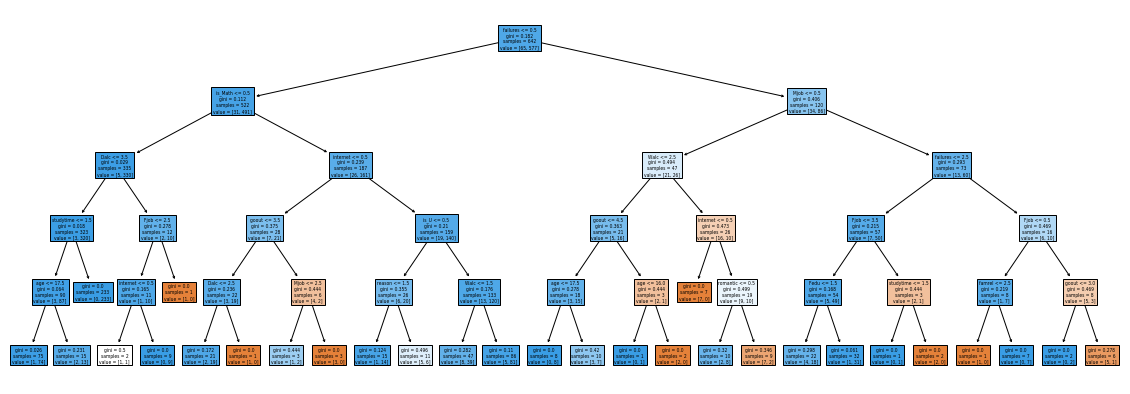

In [53]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 7))
_ = plot_tree(trees[0], feature_names=X_train_b.columns, filled=True)

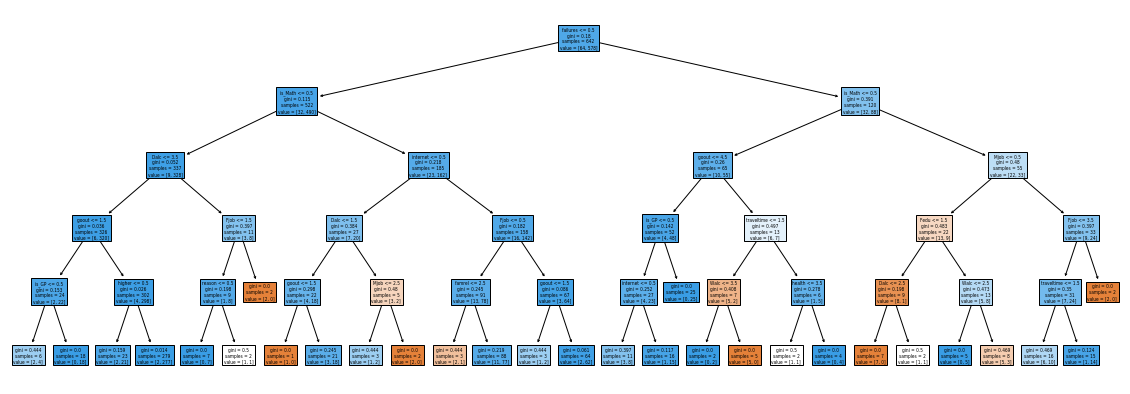

In [51]:
plt.figure(figsize=(20, 7))
_ = plot_tree(trees[2], feature_names=X_train_b.columns, filled=True)

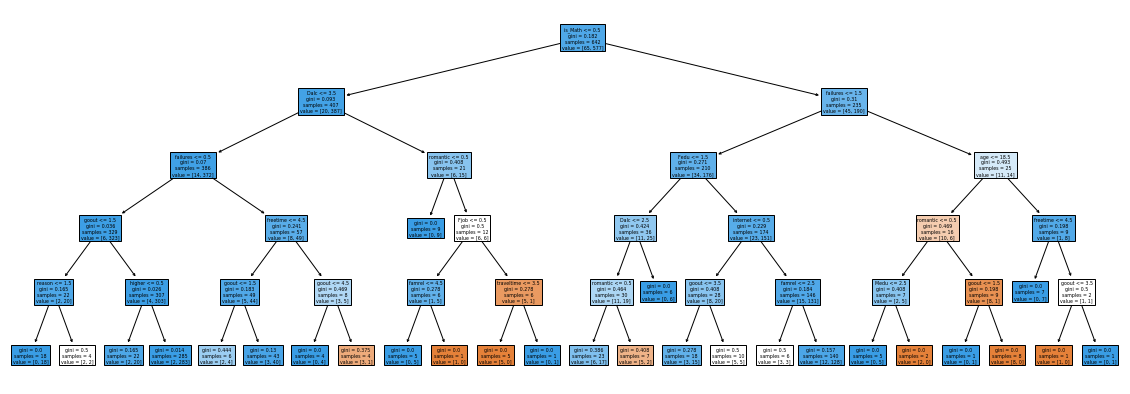

In [52]:
plt.figure(figsize=(20, 7))
_ = plot_tree(trees[6], feature_names=X_train_b.columns, filled=True)

### Задание 2  
  
На кросс-валидации (5-fold из 2 повторений) оцените, как меняется качество модели Random Forest с ростом числа деревьев (при дефолтных значениях остальных параметров). Провизуализируйте результаты. Сколько деревьев достаточно в данном случае и почему?  
**NB:** В сравнение включите конфигурацию, аналогичную простому дереву решений. 

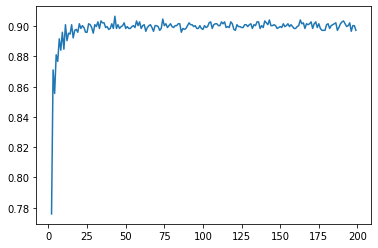

In [68]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
values = []
index = []
for i in range(2, 200):
    dt_scores = cross_val_score(RandomForestClassifier(n_estimators=i), X_train_b, y_train_b, cv=rskf, scoring='accuracy')
    index.append(i)
    values.append(pd.Series(dt_scores).mean())
    
plt.plot(index, values)
plt.show()

In [69]:
param_grid = {'n_estimators': range(2, 200)}

clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=rskf, scoring='accuracy')
clf.fit(X_train_b, y_train_b)

print(clf.best_score_)
print(clf.best_estimator_)

0.9035054347826087
RandomForestClassifier(n_estimators=108)


### Задание 3  
  
* Настройте гиперпараметры модели Random Forest на 5-fold валдиации. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.
* Обучите Random Forest  с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество (F1-score) всего ансамбля и <u>каждого дерева отдельно</u>. Постройте график распределения качества деревьев в ансамбле и сравните результаты с качеством всего леса. Дайте комментарий.  
* Выведите важность признаков в Random Forest, сделайте выводы. 

In [76]:
import time

param_grid = {'max_depth': range(2, 15),
              'n_estimators':range(10, 200, 2)} 

skf = StratifiedKFold(n_splits=5, shuffle=True)

start = time.time()
clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=skf, scoring='f1_micro', n_jobs=5)
clf.fit(X_train_b, y_train_b)
print(time.time() - start, 's')

print(clf.best_score_)
print(clf.best_estimator_)

1275.3290121555328 s
0.9078571428571429
RandomForestClassifier(max_depth=13, n_estimators=30)


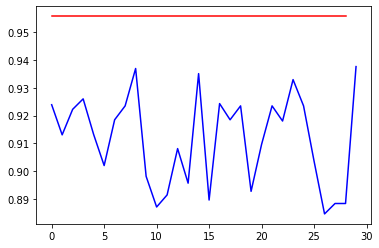

In [84]:
clf = RandomForestClassifier(n_estimators=30, 
                                  max_depth=13)
clf.fit(X_train_b, y_train_b)

f1_scores = []

for single_forest in clf.estimators_:
    f1_scores.append(f1_score(y_test_b, single_forest.predict(X_test_b)))
    
plt.plot([f1_score(y_test_b, clf.predict(X_test_b)) for i in range(1, len(f1_scores))], 'r')
plt.plot(f1_scores, 'b')

### Задание 4  
  
* Примените логистическую регрессию для решения задачи, подберите оптимальные значения гиперпараметров. Оцените качество (roc auc) на 5-fold валидации из 2 повторений. 
* Аналогично (на такой же валидации (тех же подвыборках) с такой же метрикой) оцените качество Random Forest  с подобранными в предыдущем задании параметрами. Сравните с качеством логистическом регрессии.
* Обучите логистическую модель с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество - постройте ROC-кривую, вычислите roc auc. Вычислите аналогичную метрику для Random Forest из Задания 3, сравните точность моделей. 

In [98]:
param = {'penalty': ['l1', 'l2', 'elasticnet'], 'C': np.linspace(1e-3, 1, 100)}

start = time.time()
grid = GridSearchCV(LogisticRegression(solver='saga'), param, scoring='roc_auc', cv=RepeatedKFold(n_splits=5, n_repeats=2))
grid.fit(X_train_b, y_train_b)
print(time.time() - start, 'sec')

58.77966499328613 sec


In [99]:
grid.best_estimator_

LogisticRegression(C=0.878909090909091, solver='saga')

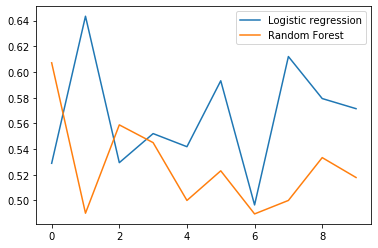

In [100]:
log = []
r = []

for train_index, test_index in RepeatedKFold(n_splits=5, n_repeats=2).split(X_train_b, y_train_b):
    X_train_curr, X_test_curr = X_train_b.to_numpy()[train_index], X_train_b.to_numpy()[test_index]
    y_train_curr, y_test_curr = y_train_b.array[train_index], y_train_b.array[test_index]
    
    clf.fit(X_train_curr, y_train_curr)
    grid.fit(X_train_curr, y_train_curr)
    
    r.append(roc_auc_score(y_test_curr, clf.predict(X_test_curr)))
    log.append(roc_auc_score(y_test_curr, grid.predict(X_test_curr)))
    
plt.plot(log, label='Logistic regression')
plt.plot(r, label='Random Forest')
plt.legend()

### Задание 5  
  
* Используйте для решения задачи один из фреймворков градиентного бустинга: XGBoost, LightGDB или CatBoost.  
* Оцените на 5-fold валидации, как растет качество модели на обучающей и на тестовой выборках при добавлении каждого дерева. Провизуализируйте результаты.  
* Настройте гиперпараметры модели на 5-fold валидации, в качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.  
* Обучите модель с настроенными параметрами на всех данных для моделирования и оцените качество на отложенной выборке. Сравните результаты с другими моделями, дайте комментарий.

In [ ]:
# your code here

##  Часть 4. Многоклассовая классификация
  
* Решите задачу многоклассовой классификации: постройте модель, пресдказывающую оценку студента по предмету по 4 балльной шкале
    - Отлично: 18 <= `G3` <= 20
    - Хорошо: 14 <= `G3` <= 17
    - Удовлетворительно: 8 <= `G3` <= 13
    - Неудовлетворительно: `G3` < 8  
  
  При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  
  
* Для решения задачи примените следующие методы:  
  * KNN  
  * Логистическая регрессия  
  * Деревья решений  
  * Random Forest
  * Gradient Boosting
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
  
  
* Оцените качество моделей, используйте confusion matrix и производные от нее метрики. Сделайте выводы.    

In [ ]:
# your code here